In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [6]:
for k in [1, 3, 5, 7, 9]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k} → Accuracy = {acc:.2f}")

K = 1 → Accuracy = 0.71
K = 3 → Accuracy = 0.80
K = 5 → Accuracy = 0.78
K = 7 → Accuracy = 0.80
K = 9 → Accuracy = 0.82


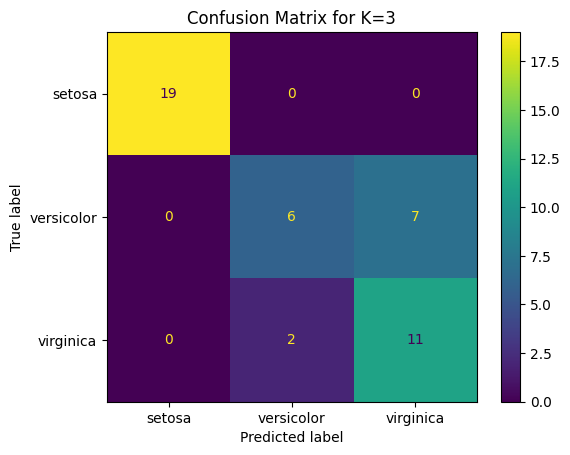

In [7]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("Confusion Matrix for K=3")
plt.show()

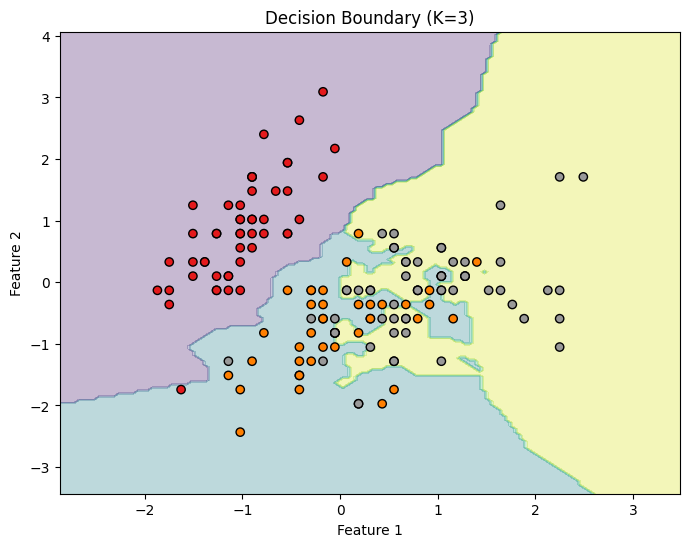

In [8]:
# Train on full data to draw boundaries
model.fit(X_scaled, y)

#grid plot
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.title("Decision Boundary (K=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()